# Air Quality Analysis in Beijing


In [1]:
import warnings
from pandas.errors import SettingWithCopyWarning

# Suppress the SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [2]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns


## Data Collection

In [3]:
def calculate_aqi(row):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    max_value = row[pollutants].max()
    
    if max_value <= 50:
        return 'Excelent'
    elif max_value <= 100:
        return 'Good'
    elif max_value <= 150:
        return 'Slightly Polluted'
    elif max_value <= 200:
        return 'Lightly Polluted'
    elif max_value <= 250:
        return 'Moderately Polluted'
    elif max_value <= 300:
        return 'Heavily Polluted'
    else:
        return 'Severely Polluted'


In [4]:
data_file = "Beijing_Multisite_air_Quality_data.csv"
data_df = pd.read_csv(data_file)
data_df['AQI'] = data_df.apply(calculate_aqi, axis=1)
data_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Heavily Polluted
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Heavily Polluted
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Heavily Polluted
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Heavily Polluted
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Heavily Polluted


In [5]:
print(f"DataFrame Shape: {data_df.shape}\n")
data_df.info()

DataFrame Shape: (420768, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
 17  AQI      420768 non-null  object 
dtypes: float64(11), int64(4), object(3)
memory usage: 57.8+ MB


In [6]:
data_df.groupby('station').size().reset_index(name='row_count')

,station,row_count
0,Aotizhongxin,35064
1,Changping,35064
2,Dingling,35064
3,Dongsi,35064
4,Guanyuan,35064
5,Gucheng,35064
6,Huairou,35064
7,Nongzhanguan,35064
8,Shunyi,35064
9,Tiantan,35064


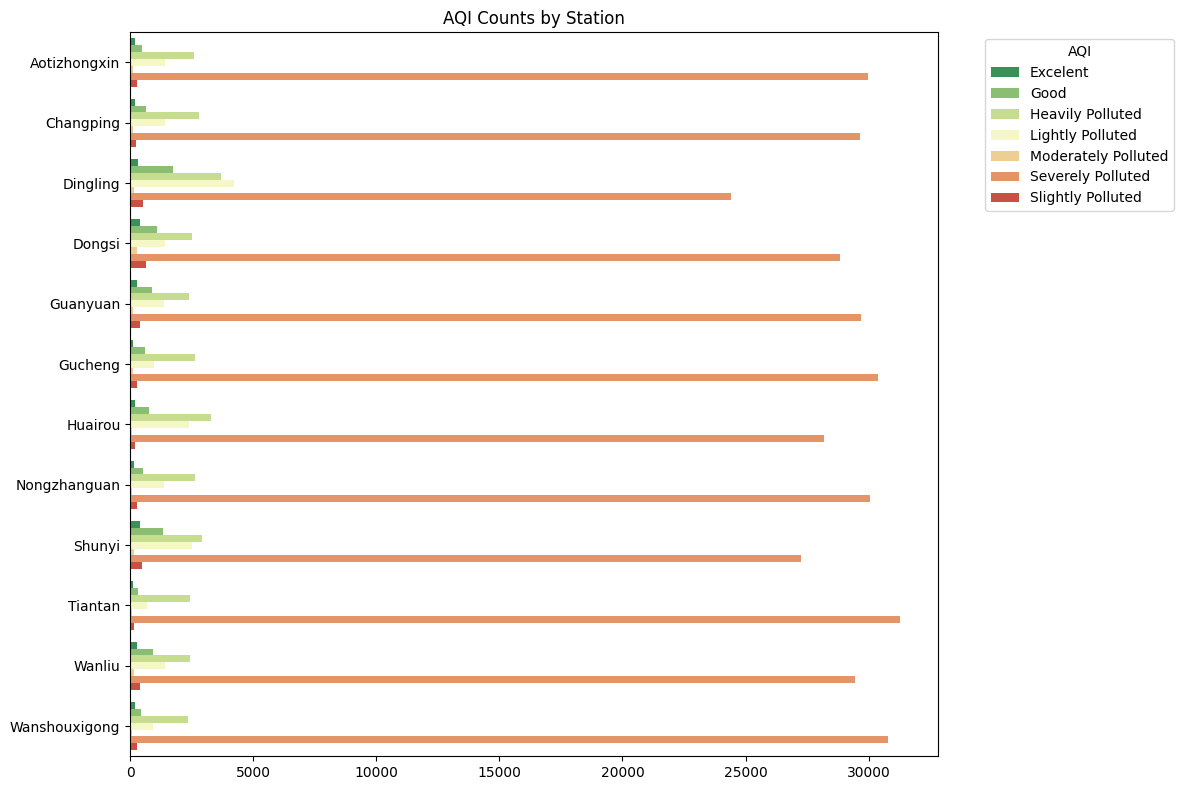

In [7]:
# Grouping by 'station' and 'AQI'
result_df = data_df.groupby(['station', 'AQI']).size().reset_index(name='row_count')

colors = sns.color_palette("RdYlGn", 7)
reversed_colors = colors[::-1]

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='station', x='row_count', hue='AQI', data=result_df, palette=reversed_colors)

# Adding titles and labels
plt.title('AQI Counts by Station')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='AQI', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
filtered_df = data_df[data_df['station'].isin(['Aotizhongxin', 'Changping'])]
filtered_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Heavily Polluted
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Heavily Polluted
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Heavily Polluted
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Heavily Polluted
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Heavily Polluted


## Data Cleaning

In [9]:
filtered_df.isnull().sum()

year          0
month         0
day           0
hour          0
PM2.5      1699
PM10       1300
SO2        1563
NO2        1690
CO         3297
O3         2323
TEMP         73
PRES         70
DEWP         73
RAIN         71
wd          221
WSPM         57
station       0
AQI           0
dtype: int64

In [10]:
filtered_df.drop(columns=['TEMP','PRES','DEWP','RAIN','wd','WSPM'], inplace=True)

In [11]:
numerical_filtered_df = filtered_df.select_dtypes(include=['number'])
mean_median_diff = numerical_filtered_df.mean() - numerical_filtered_df.median()
print("Differences between Mean and Median\n", mean_median_diff)

Differences between Mean and Median
 year      -0.337440
month     -0.477070
day       -0.270363
hour       0.000000
PM2.5     24.923797
PM10      23.343914
SO2        8.161992
NO2        7.704624
CO       407.412159
O3        12.159726
dtype: float64


In [12]:
mode = numerical_filtered_df.mode().iloc[0]
mean = numerical_filtered_df.mean()
median = numerical_filtered_df.median()

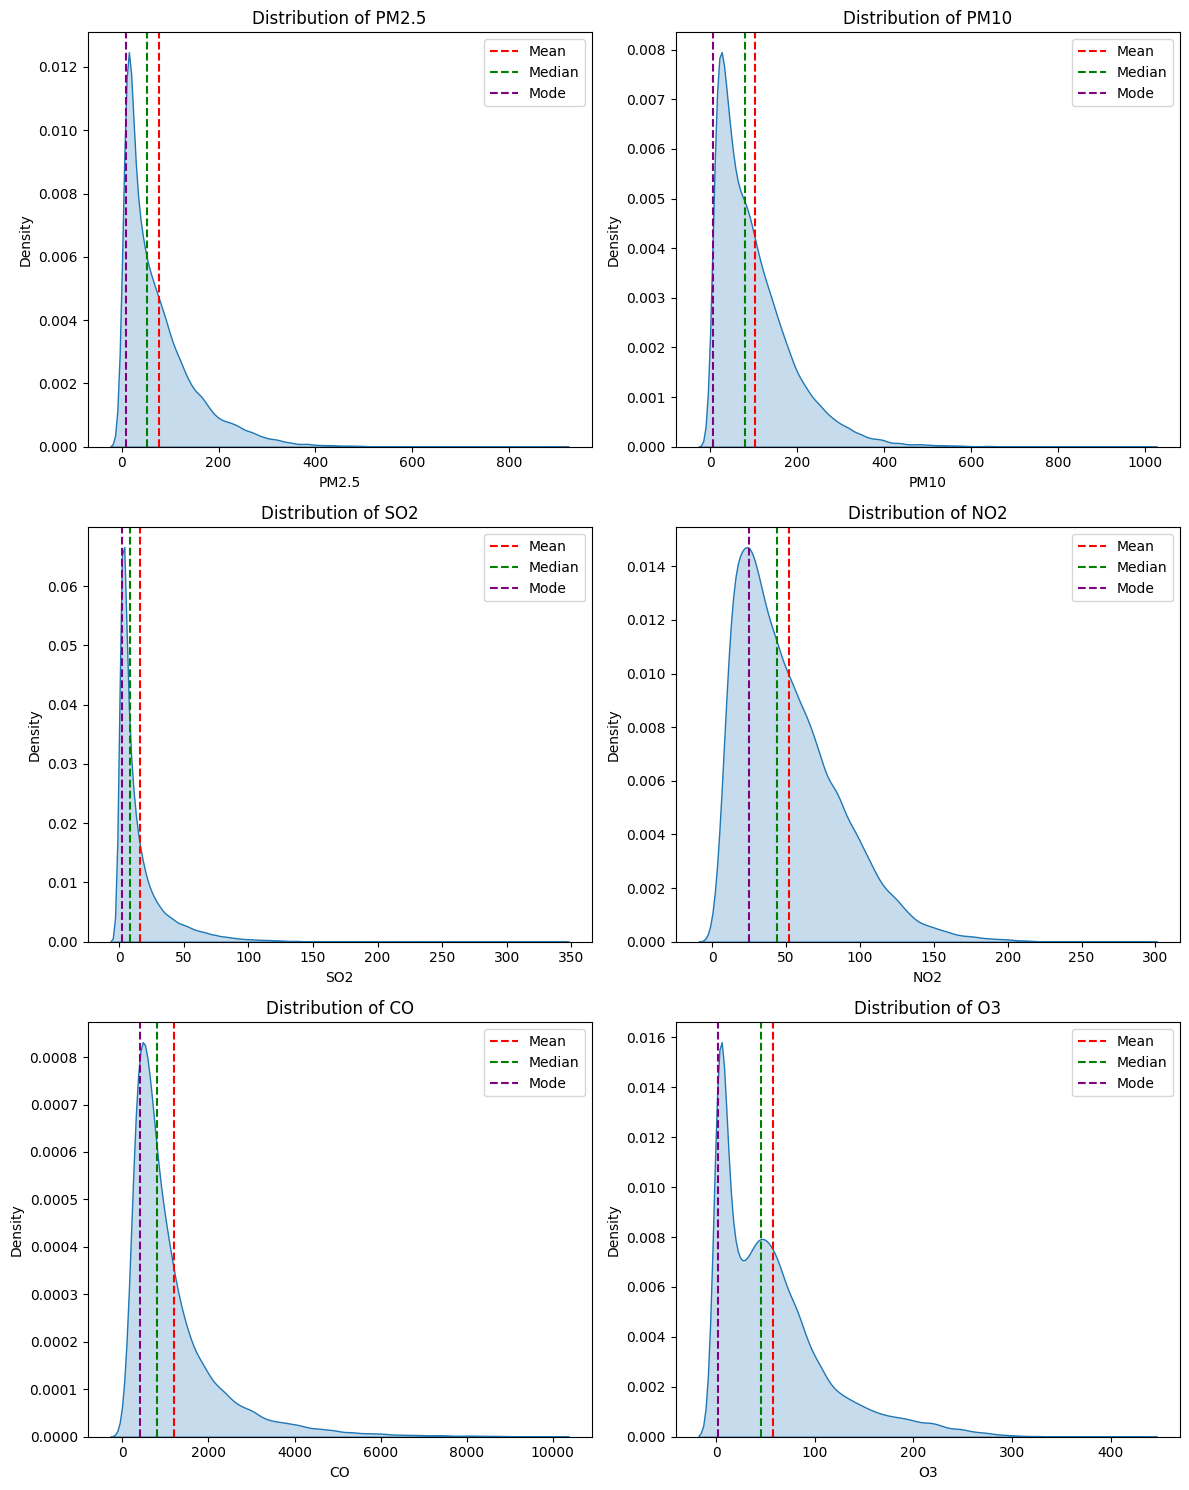

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))  
axes = axes.flatten()

columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

for i, column in enumerate(columns):
    sns.kdeplot(numerical_filtered_df[column], fill=True, ax=axes[i])
    axes[i].axvline(x=mean[column], color='red', linestyle='--', label='Mean')
    axes[i].axvline(x=median[column], color='green', linestyle='--', label='Median')
    axes[i].axvline(x=mode[column], color='purple', linestyle='--', label='Mode')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [16]:
filtered_df.fillna({
    'PM2.5': filtered_df['PM2.5'].median(),
    'PM10': filtered_df['PM10'].median(),
    'SO2': filtered_df['SO2'].median(),
    'NO2': filtered_df['NO2'].median(),
    'CO': filtered_df['CO'].median(),
    'O3': filtered_df['O3'].median()
}, inplace=True)

## Summary Statistics

In [30]:
# Group by station to compute statistics for each station
grouped = filtered_df.groupby('station')

# Define the statistics 
statistics = ['mean', 'median', 'std', 'var', 'min', 'max']

columns_to_aggregate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
summary_statistics = grouped.agg({col: statistics for col in columns_to_aggregate})

# Get station names dynamically from the index
stations = summary_statistics.index.tolist()

# Reformatting the summary statistics to print side by side
for col in summary_statistics.columns.levels[0]:
    print(f"Summary Statistics for {col}:")
    print(f"{'Statistic':<10} {stations[0]:<15} {stations[1]:<15}")
    print("-" * 45)
    
    for stat in summary_statistics[col].columns:
        stat_station_1 = summary_statistics.loc[stations[0], (col, stat)]
        stat_station_2 = summary_statistics.loc[stations[1], (col, stat)]
        print(f"{stat:<10} {stat_station_1:<15} {stat_station_2:<15}")
    
    print("\n" + "=" * 45 + "\n")  # Separator between parameters


Summary Statistics for PM2.5:
Statistic  Aotizhongxin    Changping      
---------------------------------------------
mean       81.96179272187999 70.67813712069359
median     56.0            48.0           
std        81.19496530013114 71.57920955452397
var        6592.6223900895 5123.583240450456
min        3.0             2.0            
max        898.0           882.0          


Summary Statistics for PM10:
Statistic  Aotizhongxin    Changping      
---------------------------------------------
mean       109.42437257586128 94.39797798311659
median     84.0            74.0           
std        94.34561030255378 82.7705071223413
var        8901.094183361341 6850.956849289552
min        2.0             2.0            
max        984.0           999.0          


Summary Statistics for SO2:
Statistic  Aotizhongxin    Changping      
---------------------------------------------
mean       17.12588806753365 14.834270841889117
median     8.0             7.0            
std        22

## Time Series Plots

## Histograms

## Correlation Analysis

## Trend Analysis

## Reporting